<a href="https://colab.research.google.com/github/5237-mests/Customer_Experience_Analytics_for_Fintech_Apps/blob/task-2/notebooks/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import dependencies
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#sentiment analysis
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

#keyword Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

#visuals
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

In [10]:
# Load dashen review data
dashen_df = pd.read_csv('../data/cleaned_dashen_bank_reviews.csv')


In [11]:
dashen_df

,review,rating,date,bank,source
0,love,3,2025-06-05,Dashen Bank,Google Play
1,መቸሸጠ,5,2025-06-03,Dashen Bank,Google Play
2,wow,5,2025-06-03,Dashen Bank,Google Play
3,gadaa,5,2025-06-01,Dashen Bank,Google Play
4,Massive upgrade from the Amole app.,5,2025-05-31,Dashen Bank,Google Play
...,...,...,...,...,...
443,Best,5,2025-01-13,Dashen Bank,Google Play
444,"Waw Great and innovated,user friendly, always ...",5,2025-01-13,Dashen Bank,Google Play
445,It's Best waww 🙏,5,2025-01-13,Dashen Bank,Google Play
446,Always one step ahead,5,2025-01-13,Dashen Bank,Google Play


### Preprocessing the Data

Steps:


* Clean text: Remove punctuation, special characters, convert to lowercase.
*  Tokenize: Split text into words.
*  Remove stop words: Eliminate common words (e.g., "the," "and").
*  Lemmatize: Reduce words to base form (e.g., "running" → "run").

In [12]:
# Preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
dashen_df['processed_review'] = dashen_df['review'].apply(preprocess_text)

In [14]:
dashen_df

,review,rating,date,bank,source,processed_review
0,love,3,2025-06-05,Dashen Bank,Google Play,love
1,መቸሸጠ,5,2025-06-03,Dashen Bank,Google Play,መቸሸጠ
2,wow,5,2025-06-03,Dashen Bank,Google Play,wow
3,gadaa,5,2025-06-01,Dashen Bank,Google Play,gadaa
4,Massive upgrade from the Amole app.,5,2025-05-31,Dashen Bank,Google Play,massive upgrade amole app
...,...,...,...,...,...,...
443,Best,5,2025-01-13,Dashen Bank,Google Play,best
444,"Waw Great and innovated,user friendly, always ...",5,2025-01-13,Dashen Bank,Google Play,waw great innovated user friendly always one s...
445,It's Best waww 🙏,5,2025-01-13,Dashen Bank,Google Play,best waww
446,Always one step ahead,5,2025-01-13,Dashen Bank,Google Play,always one step ahead


### Sentiment Analysis with TextBlob

Description: TextBlob provides a straightforward way to classify sentiments based on polarity scores.

In [15]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
dashen_df['sentiment'] =dashen_df['processed_review'].apply(get_sentiment)

# Display sentiment distribution
print(dashen_df['sentiment'].value_counts())

sentiment
positive    336
neutral      86
negative     26
Name: count, dtype: int64


In [16]:
dashen_df

,review,rating,date,bank,source,processed_review,sentiment
0,love,3,2025-06-05,Dashen Bank,Google Play,love,positive
1,መቸሸጠ,5,2025-06-03,Dashen Bank,Google Play,መቸሸጠ,neutral
2,wow,5,2025-06-03,Dashen Bank,Google Play,wow,positive
3,gadaa,5,2025-06-01,Dashen Bank,Google Play,gadaa,neutral
4,Massive upgrade from the Amole app.,5,2025-05-31,Dashen Bank,Google Play,massive upgrade amole app,neutral
...,...,...,...,...,...,...,...
443,Best,5,2025-01-13,Dashen Bank,Google Play,best,positive
444,"Waw Great and innovated,user friendly, always ...",5,2025-01-13,Dashen Bank,Google Play,waw great innovated user friendly always one s...,positive
445,It's Best waww 🙏,5,2025-01-13,Dashen Bank,Google Play,best waww,positive
446,Always one step ahead,5,2025-01-13,Dashen Bank,Google Play,always one step ahead,neutral


### Sentiment Analysis with VADER
Description: VADER is tailored for short texts like reviews, accounting for sentiment intensity and informal language.

In [17]:
# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER
sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    scores = sia.polarity_scores(text)
    if scores['compound'] > 0.05:
        return 'positive'
    elif scores['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply VADER sentiment analysis
dashen_df['vader_sentiment'] = dashen_df['review'].apply(get_vader_sentiment)

# Display sentiment distribution
print(dashen_df['vader_sentiment'].value_counts())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mesfin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


vader_sentiment
positive    330
neutral      94
negative     24
Name: count, dtype: int64


In [18]:
dashen_df

,review,rating,date,bank,source,processed_review,sentiment,vader_sentiment
0,love,3,2025-06-05,Dashen Bank,Google Play,love,positive,positive
1,መቸሸጠ,5,2025-06-03,Dashen Bank,Google Play,መቸሸጠ,neutral,neutral
2,wow,5,2025-06-03,Dashen Bank,Google Play,wow,positive,positive
3,gadaa,5,2025-06-01,Dashen Bank,Google Play,gadaa,neutral,neutral
4,Massive upgrade from the Amole app.,5,2025-05-31,Dashen Bank,Google Play,massive upgrade amole app,neutral,neutral
...,...,...,...,...,...,...,...,...
443,Best,5,2025-01-13,Dashen Bank,Google Play,best,positive,positive
444,"Waw Great and innovated,user friendly, always ...",5,2025-01-13,Dashen Bank,Google Play,waw great innovated user friendly always one s...,positive,positive
445,It's Best waww 🙏,5,2025-01-13,Dashen Bank,Google Play,best waww,positive,positive
446,Always one step ahead,5,2025-01-13,Dashen Bank,Google Play,always one step ahead,neutral,neutral


# Advanced Sentiment Analysis with Machine Learning

Description: Machine learning models like Naive Bayes improve accuracy by training on labeled data.

**Steps**:
* Use star ratings as labels (e.g., 4-5 stars = positive, 1-2 stars = negative).
* Extract features using TF-IDF.
* Train and evaluate a classifier.

In [19]:
# Create labels based on ratings
dashen_df['label'] = dashen_df['rating'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral'))

# Vectorize text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dashen_df['processed_review'])
y = dashen_df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.7888888888888889


Keyword Extraction with TF-IDF





Description: TF-IDF identifies words that are important in specific reviews relative to the entire dataset.

In [20]:
# Vectorize the dataset
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(dashen_df['processed_review'])

# Get top keywords
keywords = vectorizer.get_feature_names_out()
print("Top Keywords:", keywords)

Top Keywords: ['able' 'account' 'ahead' 'also' 'always' 'amazing' 'amole' 'app'
 'application' 'bank' 'banking' 'best' 'better' 'bill' 'budget' 'changer'
 'chat' 'convenience' 'convenient' 'customer' 'dashen' 'design' 'digital'
 'easier' 'easily' 'easy' 'ethiopia' 'ethiopian' 'ever' 'everything'
 'excellent' 'experience' 'fast' 'feature' 'financial' 'friendly' 'game'
 'good' 'great' 'highly' 'incredibly' 'innovation' 'interface' 'intuitive'
 'keep' 'life' 'like' 'local' 'lot' 'love' 'make' 'making' 'many' 'mobile'
 'money' 'need' 'never' 'new' 'nice' 'one' 'option' 'pay' 'payment'
 'place' 'platform' 'product' 'really' 'recommended' 'reliable' 'seamless'
 'secure' 'security' 'service' 'shopping' 'simple' 'slow' 'smooth'
 'solution' 'speed' 'step' 'super' 'superapp' 'supper' 'telebirr' 'thanks'
 'time' 'transaction' 'transfer' 'truly' 'update' 'use' 'used' 'user'
 'using' 'version' 'well' 'work' 'working' 'wow' 'ነው']


# Combining Sentiment Analysis and Keyword Extraction

Description: Analyze keywords in positive vs. negative reviews to understand user preferences and issues.

In [21]:
# Filter positive and negative reviews
positive_reviews = dashen_df[dashen_df['sentiment'] == 'positive']['processed_review']
negative_reviews =dashen_df[dashen_df['sentiment'] == 'negative']['processed_review']

# Extract keywords from positive reviews
vectorizer_pos = TfidfVectorizer(max_features=10)
X_pos = vectorizer_pos.fit_transform(positive_reviews)
print("Top Keywords in Positive Reviews:", vectorizer_pos.get_feature_names_out())

# Extract keywords from negative reviews
vectorizer_neg = TfidfVectorizer(max_features=10)
X_neg = vectorizer_neg.fit_transform(negative_reviews)
print("Top Keywords in Negative Reviews:", vectorizer_neg.get_feature_names_out())

Top Keywords in Positive Reviews: ['app' 'bank' 'banking' 'best' 'dashen' 'fast' 'feature' 'good' 'one'
 'super']
Top Keywords in Negative Reviews: ['app' 'bank' 'banking' 'disappointing' 'ever' 'experience' 'need' 'slow'
 'time' 'transaction']


# Visualizing the Results

**Visualizations**:
* Bar Chart: Show the distribution of positive, negative, and neutral sentiments.
* Word Cloud: Visualize frequent keywords in positive and negative reviews.

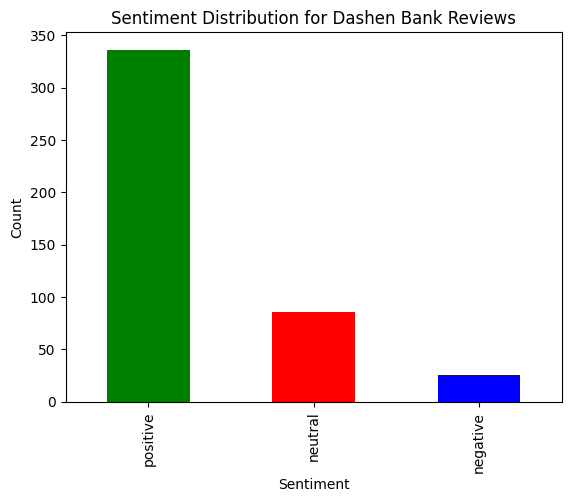

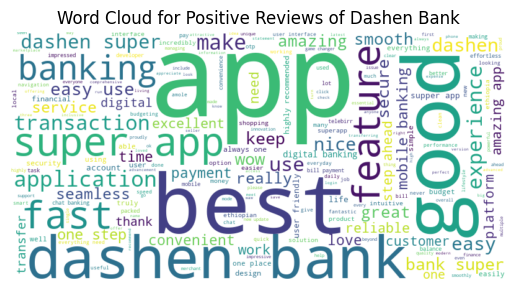

In [25]:
# Sentiment distribution
dashen_df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution for Dashen Bank Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Word cloud for positive reviews
positive_text = ' '.join(positive_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews of Dashen Bank')
plt.show()

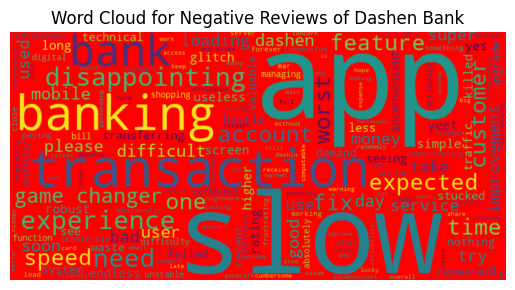

In [24]:
negative_text = ' '.join(negative_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews of Dashen Bank')
plt.show()